MachineLeaningCourse vol.7
# サポートベクターマシン

サポートベクターマシン（Support Vector Machine：SVM）は広く利用されている強力な学習アルゴリズムの１つであり、パーセプトロンの拡張と見なすことが出来きます。

SVMはマージン最大化という考えで、高い汎化性能を持つことが知られています。マージンとは、超平面とこの超平面に最も近いトレーニングサンプルとの間の距離として定義されます。

今回は、SVMがどのような考えでデータを識別するように学習を行うのかを説明していきたいと思います。

SVMは、カーネル法を用いることで非線形への拡張ができるので、線形分離不可能な場合でも適用可能になる。それゆえ、高い性能と人気を誇るアルゴリズムである。

#### 2クラス分類
２つのクラスを分ける超平面は無数にあります。その際に、最もよい超平面とは汎化性能が高いものです。

例えば、パーセプトロンで以下のようなクラスの端のギリギリを通る決定境界（緑の線）を引いてしまった場合、新しいサンプルに対応できない可能性が高いです。
![](https://s3.amazonaws.com/ai-standard/pic7-2.png)

そこで考えられたのが、SVMです。
SVMでは図のように、__2つのグループ間の最も距離の離れた箇所（最大マージン）を見つけ出し、その真ん中に識別の線を引きます__。

マージンとは、引いた境界線と、データの最短距離のことを言います。
超平面に最も近いトレーニングサンプルは__サポートベクトル__と呼びます。
![](https://s3.amazonaws.com/ai-standard/pic7-1.png)

このように最大マージンの真ん中に引いた線が、最も汎化能力が高い事が期待出来ます。

### 最大マージンの求め方
まずは、決定境界に沿った正(pos)と負(neg)の超平面は以下のように定義できる。

$$w_0 + w^Tx_{pos} = 1$$

$$w_0 + w^Tx_{neg} = -1$$

上記の式を引き算すると、以下になる。

$$w^T(x_{pos} - x_{neg}) = 2$$

ここで、ベクトルの長さを定義して、上記の式を標準化する。

$$\frac {w^T(x_{pos} - x_{neg})} {||w||} = \frac{2}{||w||}$$

$$ただし、||w|| = \sqrt[]{\sum^{m}_{j=1} w^2_j}$$

この式の左辺は、正の超平面と負の超平面の距離であると解釈できる。これは最大化したいマージンそのものである。

SVMの目的関数を最大化する問題は、$\frac{2}{||w||}$の最大化となる。

しかし、$\frac{2}{||w||}$は計算が難しいので、逆数をとって２乗した$\frac{1}{2}||w||^2$を最小化する方が簡単です。



そして、SVMにはサンプルが正しく分類されているという__制約__があります。

$$w_0 + w^Tx^{(i)} \geq 1$$

$$w_0 + w^Tx^{(i)} < -1$$

これら２つの式は、基本的には負のサンプルはすべて負の超平面側にあり、正のサンプルはすべて正の超平面の後ろに収まることを意味している。

２つの式をまとめると、

$$y^{(i)}(w_0 + w^Tx^{(i)}) \geq 1$$

となる。（$y^{(i)}=-1,1$）


これらをまとめると、SVMが解く問題は以下になります。

$$min. \  \frac{1}{2}||w||^2$$

$$s.t.\  y^{(i)}(w_0 + w^Tx^{(i)}) \geq 1$$

#### スラック変数の導入
これまで見てきたようにSVMは、__データがマージン内に入らないことを前提__としています。

しかし、現実的にそうなるようなデータセットはなかなかありません。したがって、__データの誤分類を許すようにSVMを修正__します。

そのためにまず、__スラック変数__  $\xi$をデータごとに導入します。

スラック変数は、データが正しく分類されかつマージン境界上または外側にある場合は0、正しく分類されているがマージン内に侵入してしまっているデータは 0 < $\xi $ <= 1、分類境界を越えて誤分類されてしまったデータは $\xi$ > 1となります。

$$w_0 + w^Tx^{(i)} \geq 1 - \xi^{(i)}$$

$$w_0 + w^Tx^{(i)} < - 1+ \xi^{(i)}$$

したがって、最小化すべき対象は以下の様になります。

$$ \frac{1}{2}||w||^2 + C \Bigl(\sum_{i} \xi^{(i)} \Bigr)$$

あとは、変数Cを使って誤分類のペナルティを抑制すればいよい。Cの値が大きい場合は誤分類のペナルティが大きいことを意味し、Cの値が小さい場合は誤分類に対してより寛大であることを意味する。

### scikit-learnでSVMを実践
##### Irisデータセットの読み込み

In [73]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [74]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
scaler.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = scaler.transform(X_train)
X_test_std =  scaler.transform(X_test)

In [76]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

##### 線形SVCの適応

In [79]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

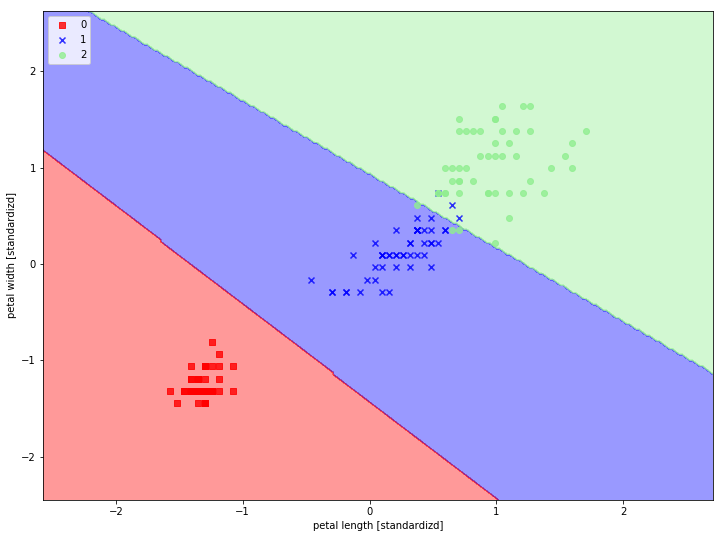

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
    
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(12, 9))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm)
plt.xlabel("petal length [standardizd]")
plt.ylabel("petal width [standardizd]")

plt.legend(loc = "upper left")
plt.show()

### 非線形問題へカーネルSVMを適用する
SVMのメリットとして、非線形分類の問題を解くために「カーネル化」するのが容易であることがあげられます。

まずは、非線形分類問題とはどういうものなのかを、データセットを作りながら確認していきます。

numpyのlogical_xor関数を使ってXORのデータを作成します。

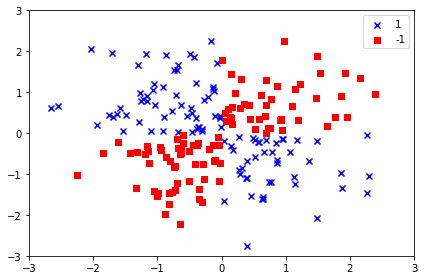

In [86]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

いままでのロジスティック回帰や線形SVMなどのモデルでは、このデータセットを上手に分類することは難しいです。

そうした線形分離不可能なデータを処理するのが、カーネル法の発想です。
カーネル法とは、射影関数$\Phi(・)$を用いて、それらの組み合わせを高次元空間に射影し、線形分離できるようにすることです。


以下の図を見るとイメージしやすいでしょう。
グラフに示されている２つのクラスを線形超平面を使って分割できるようになります。それを元の特徴空間に射影すると、非線形の決定境界になります。
![](https://s3.amazonaws.com/ai-standard/pic7-3.png)

このような射影手法には新しい特徴量を生成する計算コストが非常に高いという問題点がある。ここで役に立つのが「カーネルトリック」です。

カーネルとは、ざっくり言うと２つのサンプル間の__類似度__を表すものです。

一番計算コストが高いのは、ベクトルのドット積($x^{(i)T}x^{(j)}$)です。これを普通に計算すると計算量が高く付くため、カーネル関数を定義します。

最も広く使われているカーネルの一つは、動径基底関数カーネル（rbfカーネル・ガウスカーネル）と呼ばれるものです。

$$k(x^{(i)} ,x^{(j)}) = \exp \Bigl ( - \gamma \ ||x^{(i)} - x^{(j)}||\Bigr )$$

ただし、$\gamma = \frac{1}{2\sigma^2}$となります。ここでの$\gamma$は最適化されるハイパーパラメータです。

$\gamma$__の値を小さくすると、トレーニングデータによりフィットするように計算される。__

ではここから、XORデータを使って、RBFカーネルの凄さを見ていきましょう。

まずは比較対象として、線形SVMを使って、学習させてみます。

##### XORデータ｜線形SVM

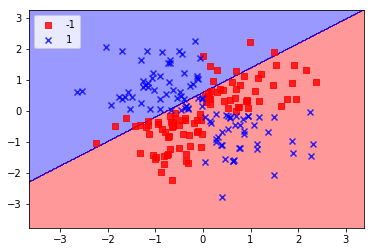

In [92]:
linear_svm = SVC(kernel='linear', random_state=0, gamma=0.10, C=10.0)
linear_svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=linear_svm)

plt.legend(loc='upper left')
plt.show()

##### XORデータ｜カーネルSVM

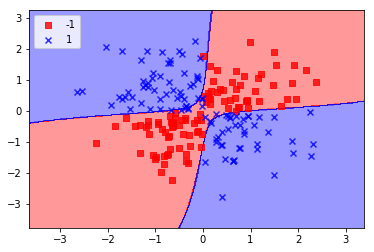

In [90]:
rbf_svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
rbf_svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=rbf_svm)

plt.legend(loc='upper left')
plt.show()

このように、RBFカーネルを使用すると、綺麗にXORデータが分類できることが分かりました。

ここで気をつけておきたいのは、$\gamma$のチューニングによってトレーニングデータにうまくフィットさせすぎないことが大切です。
過学習を抑制し、$\gamma$を最適な数値に設定できるように工夫が必要です。

次回からは、汎化能力をあげるために必要な、評価指標や決定曲線などの概念を勉強していきます。